Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import recall_score, f1_score, precision_score

# Data Preparation and Cleaning

In [2]:
# Load the wine quality dataset
wine_df = pd.read_csv('D:\Distributed Data Analysis\Winequality.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
# Check for any missing values in the dataset
print("Number of missing values before cleaning:\n", wine_df.isnull().sum())

Number of missing values before cleaning:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [4]:
# Drop any duplicated rows in the dataset
wine_df.drop_duplicates(inplace=True)
print("Number of duplicated rows removed:", wine_df.duplicated().sum())

Number of duplicated rows removed: 0


In [5]:
# Removing Id as it wont help in Model building
wine_df.drop('Id',axis =1, inplace = True)

The code below will plot a box plot for each feature in the wine quality dataset to visualize outliers. It will then calculate the Interquartile Range (IQR) for each feature and count the number of outliers for each feature. Finally, it will print the number of outliers for each feature.

Number of outliers for each feature:
 fixed acidity            44
volatile acidity         14
citric acid               1
residual sugar          110
chlorides                77
free sulfur dioxide      18
total sulfur dioxide     40
density                  36
pH                       20
sulphates                43
alcohol                  12
quality                  22
dtype: int64


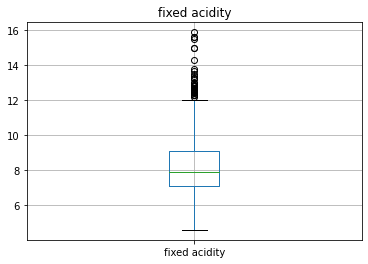

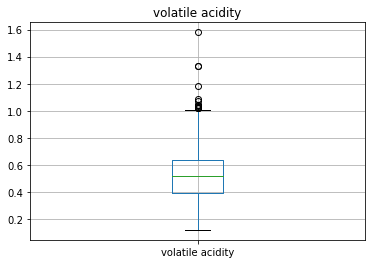

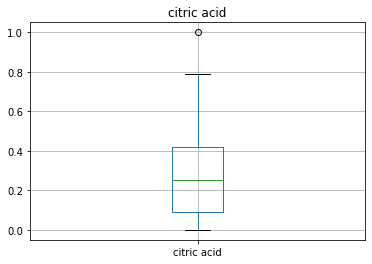

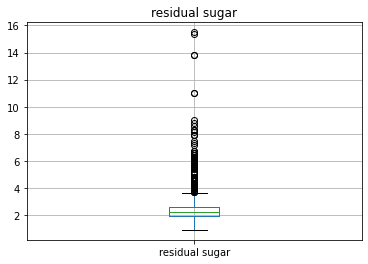

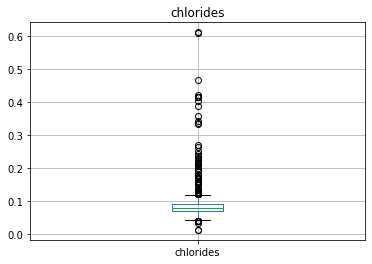

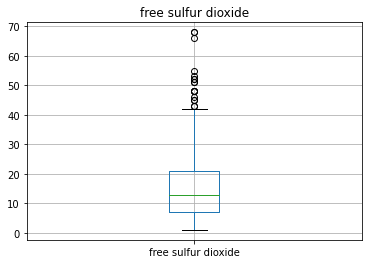

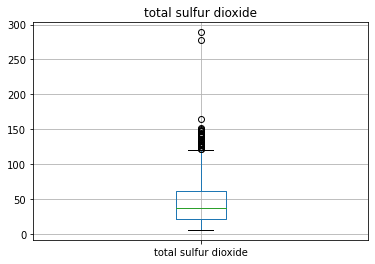

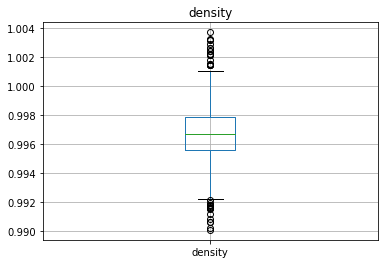

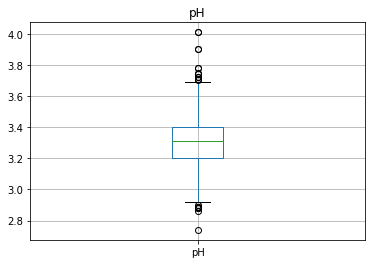

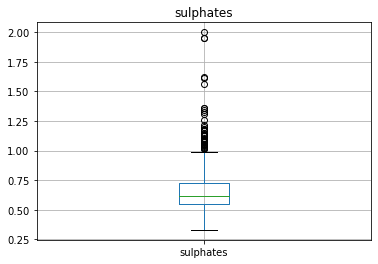

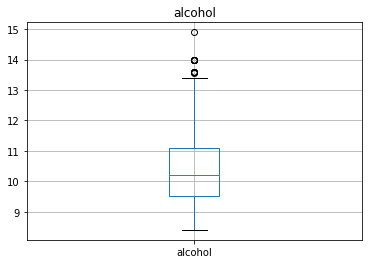

In [6]:
# Plot box plots for each feature to visualize outliers
for column in wine_df.columns[:-1]:
    plt.figure()
    wine_df.boxplot([column])
    plt.title(column)

# Calculate the Interquartile Range (IQR) for each feature
Q1 = wine_df.quantile(0.25)
Q3 = wine_df.quantile(0.75)
IQR = Q3 - Q1

# Count the number of outliers for each feature
outliers = ((wine_df < (Q1 - 1.5 * IQR)) | (wine_df > (Q3 + 1.5 * IQR))).sum()

# Print the number of outliers for each feature
print("Number of outliers for each feature:\n", outliers)

In [7]:
# Define the lower and upper bounds for outliers
lower_bounds = Q1 - 1.5 * IQR
upper_bounds = Q3 + 1.5 * IQR

# Remove outliers from each feature
for column in wine_df.columns[:-1]:
    wine_df = wine_df[(wine_df[column] >= lower_bounds[column]) & (wine_df[column] <= upper_bounds[column])]


Number of outliers for each feature:
 fixed acidity            0
volatile acidity         0
citric acid              0
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                  0
quality                 14
dtype: int64


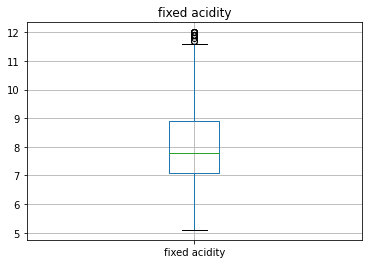

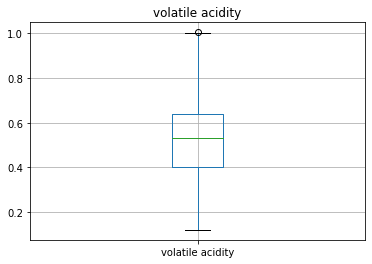

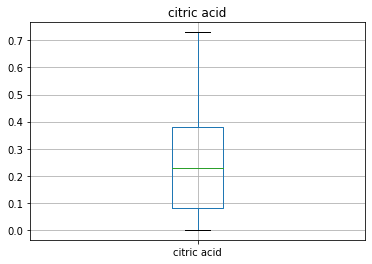

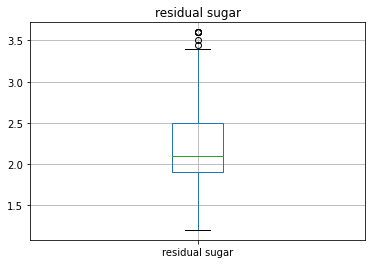

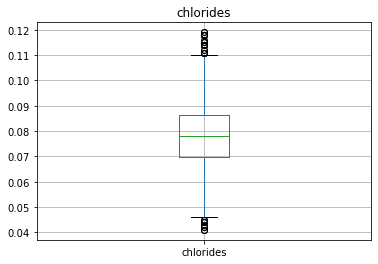

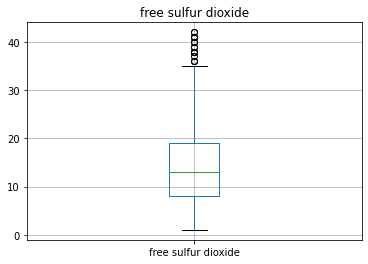

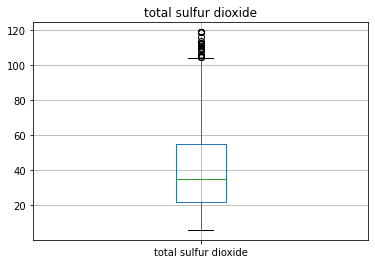

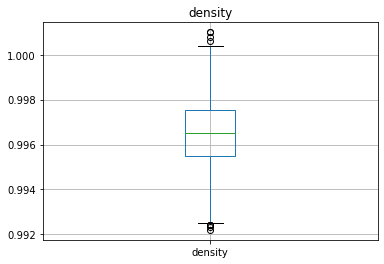

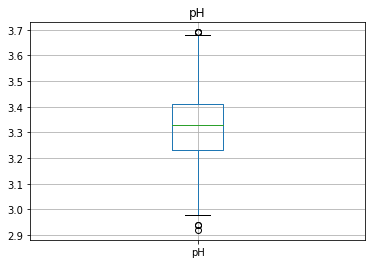

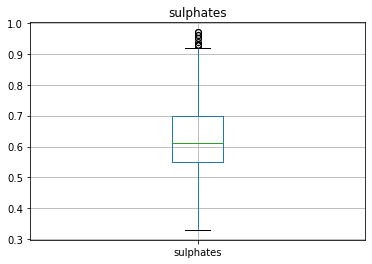

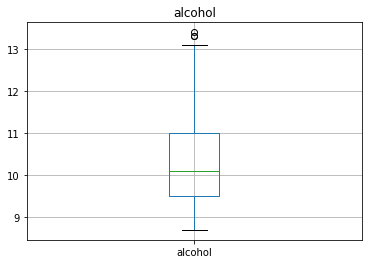

In [8]:
# Plot box plots for each feature to visualize outliers
for column in wine_df.columns[:-1]:
    plt.figure()
    wine_df.boxplot([column])
    plt.title(column)

# Count the number of outliers for each feature
outliers = ((wine_df < (Q1 - 1.5 * IQR)) | (wine_df > (Q3 + 1.5 * IQR))).sum()

# Print the number of outliers for each feature
print("Number of outliers for each feature:\n", outliers)

# Exploratory Data Analysis

In [9]:
# Print the first 5 rows of the dataset
print(wine_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [10]:
# Print the number of rows and columns in the dataset
print("Number of rows and columns:", wine_df.shape)

Number of rows and columns: (848, 12)


In [11]:
# Print the summary statistics of the dataset
wine_df.describe().style.background_gradient()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000
mean,8.091392,0.529298,0.239057,2.186969,0.078479,14.788915,41.785377,0.996536,3.326722,0.631616,10.368141,5.654481
std,1.405163,0.165288,0.179637,0.446730,0.014318,8.720047,25.715153,0.001605,0.135566,0.114264,0.981418,0.769675
min,5.100000,0.120000,0.000000,1.200000,0.041000,1.000000,6.000000,0.992200,2.920000,0.330000,8.700000,3.000000
25%,7.100000,0.400000,0.080000,1.900000,0.069750,8.000000,22.000000,0.995500,3.230000,0.550000,9.500000,5.000000
50%,7.800000,0.530000,0.230000,2.100000,0.078000,13.000000,35.000000,0.996520,3.330000,0.610000,10.100000,6.000000
75%,8.900000,0.640000,0.380000,2.500000,0.086250,19.000000,55.000000,0.997525,3.410000,0.700000,11.000000,6.000000
max,12.000000,1.005000,0.730000,3.600000,0.119000,42.000000,119.000000,1.001000,3.690000,0.970000,13.400000,8.000000


The data has different scales, which may affect the training of the model if it is not normalized. This will be done in a later stage.

Data visualization - Boxplot and Distributions

It is noticeable from the plots below that most of the data has a symmetrical distribution and a few show negative or positive distribution. This is because the outliers were removed.

Text(0.5, 0.98, 'Visualizing columns')

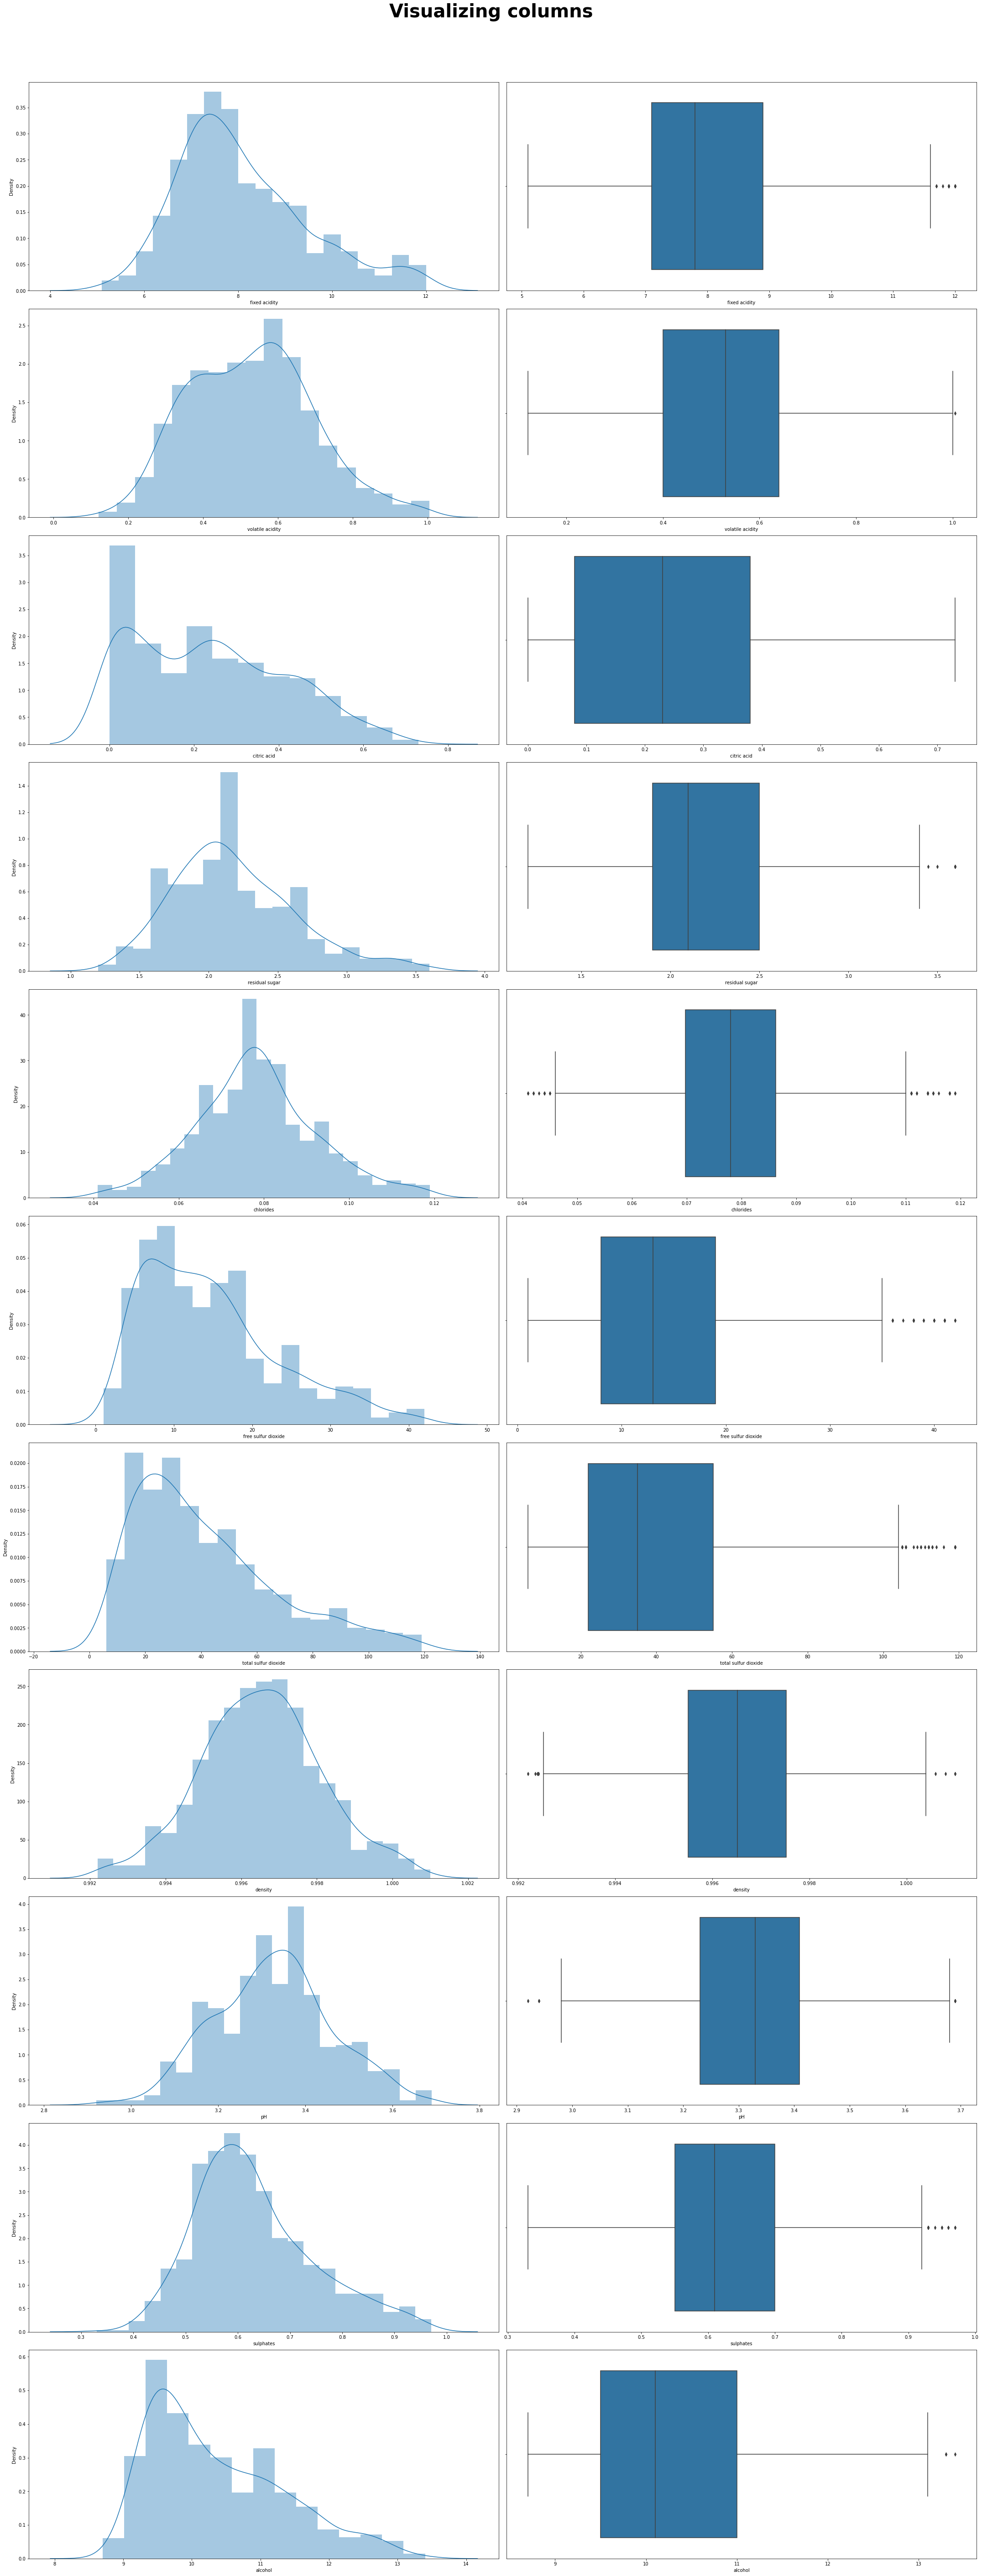

In [12]:
fig, ax = plt.subplots(11, 2, figsize=(30, 80))

# Exclusion of the `quality` feature by considering only the variable "float64"
for index, i in enumerate(wine_df.select_dtypes(include=["float64"]).columns):
    sns.distplot(wine_df[i], ax=ax[index, 0])
    sns.boxplot(wine_df[i], ax=ax[index, 1])

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing columns", fontweight="bold", fontsize=40)

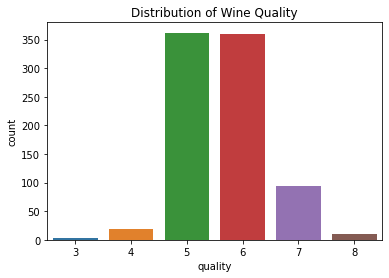

In [13]:
# Check the distribution of the target variable
sns.countplot(x="quality", data=wine_df)
plt.title("Distribution of Wine Quality")
plt.show()

The values of the 'quality' column are very unbalanced. The values 5 and 6 are dominant, and the values 0, 1 and 2 are almost absent from the set.

Correlation Matrix

Next I wanted to see the correlations between the variables that I’m working with. This allows me to get a much better understanding of the relationships between my variables in a quick glimpse.

Immediately, I can see that there are some variables that are strongly correlated to quality. It’s likely that these variables are also the most important features in our machine learning model.

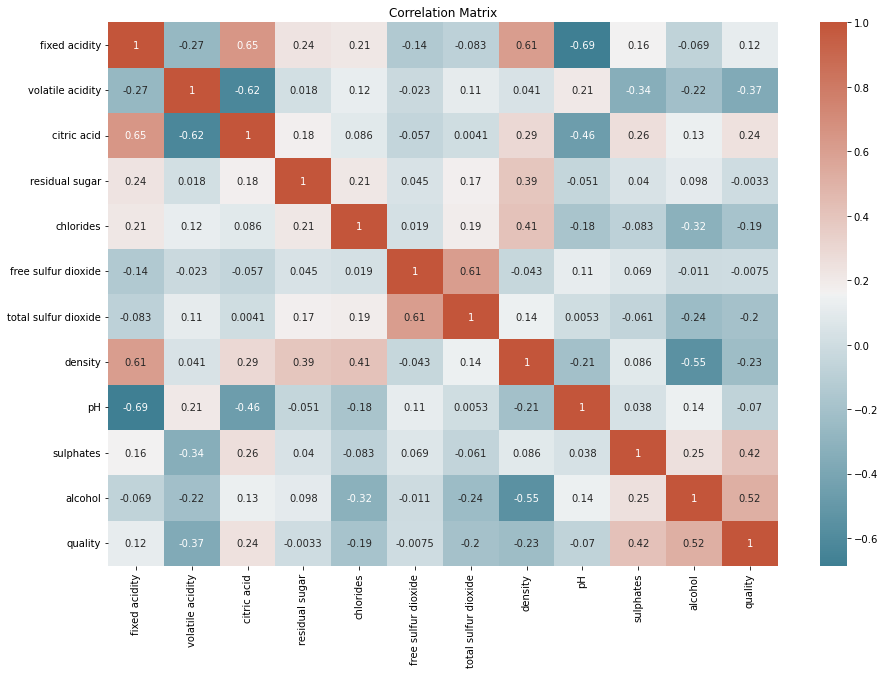

In [14]:
# Check the correlation between the features and the target variable
corr_matrix = wine_df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title("Correlation Matrix")
plt.show()

Observation:

from here we notice that impact of 'residual sugar', 'free sulfur dioxide' and 'ph' on 'quality' is negligible. So we can drop them. Also we observe that the relationship between 'alcohol' and 'quality' is maximum.

In [15]:
new_wine_df = wine_df.drop(["residual sugar",'free sulfur dioxide','pH'], axis=1)

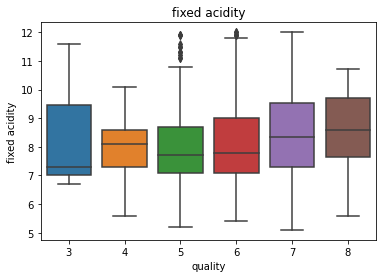

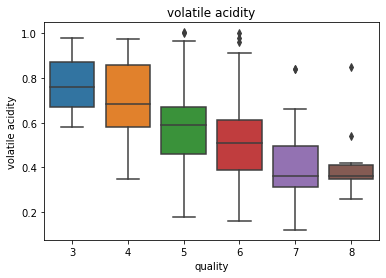

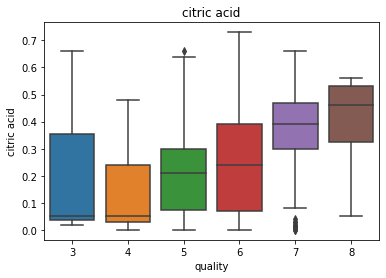

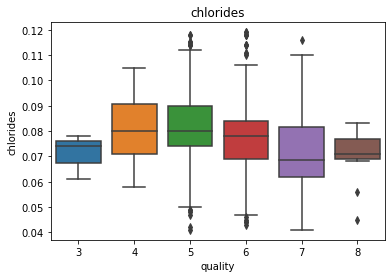

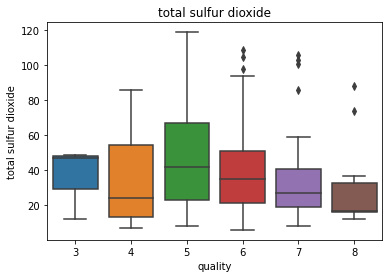

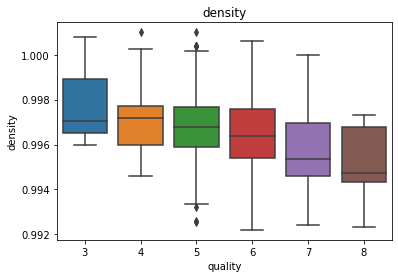

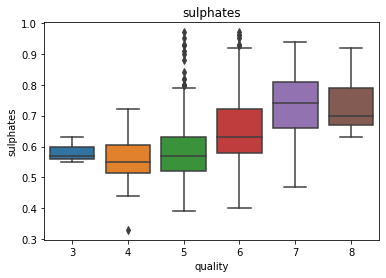

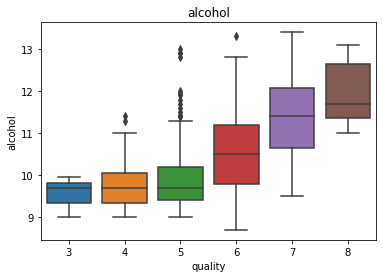

In [16]:
# Plot box plots for each feature
for column in new_wine_df.columns[:-1]:
    plt.figure()
    sns.boxplot(x="quality", y=column, data=new_wine_df)
    plt.title(column)
    plt.show()

Let's summarise the above plots

Highly rated wines has comparitively higher alcohol, citric acid, and sulphates levels. On the contrary, wines with high volatile acidity, density, and pH are low in quality. And lastly, wines quality has no significant relationship with total sulphur dioxide, free sulphur dioxide, chlorides, residual sugar, and fixed acidity.

Next, we use K-means clustering which is an unsupervised learning method to identify groups of similar wines based on their physicochemical properties

In [17]:
# Select the columns to be used for clustering
X = new_wine_df.iloc[:, :-1]

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

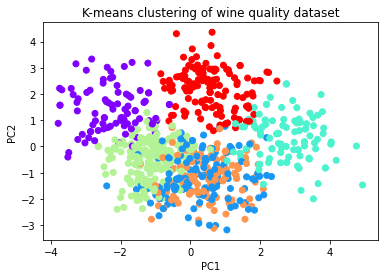

In [18]:
# Fit the K-means model with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=0).fit(X)

# Assign the cluster labels to each data point
labels = kmeans.labels_

# Apply PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means clustering of wine quality dataset')
plt.show()

Each point represents a wine, and the color of the point represents the cluster to which it belongs. In this case, we reduced the dimensionality of the wine quality dataset to two dimensions for easy visualization.

The different colors in the plot represent the different clusters identified by the K-means algorithm. As we can see, there are six different clusters represented by six different colors. Each cluster consists of wines that have similar physicochemical properties, as determined by the K-means algorithm.

# Machine Learning Method SVM

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

First, we need to split the data into features (F) and target (T):

In [24]:
F = wine_df.drop('quality', axis=1)
T = wine_df['quality']

Now, we need to scale the features using StandardScaler:

In [25]:
scaler = StandardScaler()
F_scaled = scaler.fit_transform(F)

Then, we need to split the data into training and testing sets:

In [26]:
F_train, F_test, T_train, T_test = train_test_split(F_scaled, T, test_size=0.3, random_state=42)

Now, we are ready to create our SVM model using the SVC function from sklearn:

In [27]:
model = SVC(kernel='poly')

We can train our model using the fit method:

In [28]:
model.fit(F_train, T_train)

SVC(kernel='poly')

Finally, we can use our trained model to make predictions on the testing set and evaluate its performance:

In [29]:
T_pred = model.predict(F_test)
print(classification_report(T_test, T_pred, zero_division = 1))
print(confusion_matrix(T_test, T_pred))

              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.64      0.86      0.73       106
           6       0.70      0.57      0.63       115
           7       0.72      0.43      0.54        30
           8       1.00      0.00      0.00         2

    accuracy                           0.67       255
   macro avg       0.68      0.31      0.32       255
weighted avg       0.68      0.67      0.65       255

[[ 0  0  1  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  1 91 13  1  0]
 [ 0  0 46 66  3  0]
 [ 0  0  3 14 13  0]
 [ 0  0  0  1  1  0]]


# HIGH PERFORMANCE COMPUTATIONAL IMLEMENTATION

In [30]:
!pip install pyspark

In [45]:
import numpy as np
from pyspark.conf import SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler,  StandardScaler, StringIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator

In [46]:
spark = SparkSession.builder.master("local[*]").appName("Wine-Quality-Analysis").getOrCreate()
sc=spark.sparkContext

In [47]:
wine_df.to_csv('wine_data.csv', index=False)

In [48]:
wine_data = spark.read.csv("wine_data.csv", header=True, inferSchema=True)

In [49]:
assembler = VectorAssembler(inputCols=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'], outputCol='features')
transformed_data = assembler.transform(wine_data).select(col("quality").alias("label"), col("features"))

In [50]:
(train_data, test_data) = transformed_data.randomSplit([0.8, 0.2], seed=42)

In [51]:
lr = LogisticRegression(featuresCol='features', labelCol='label', family='multinomial')

In [52]:
model = lr.fit(train_data)

In [53]:
predictions = model.transform(test_data)

In [56]:
evaluator_f1 = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='label', metricName='f1')
f1_score = evaluator_f1.evaluate(predictions)
evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='label', metricName='accuracy')
accuracy = evaluator.evaluate(predictions)
evaluator_precision = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='label', metricName='weightedPrecision')
precision = evaluator_precision.evaluate(predictions)
print('F1 Score:', f1_score)
print('Accuracy:', accuracy)
print('Precision:', precision)

F1 Score: 0.5472185183875458
Precision: 0.537460183128225
Accuracy: 0.5693430656934306
